In [1]:
import numpy as np
A=np.array([[0.8,0.2],[0.7,0.3],[0.6,0.3],[0.2,0.8],[0.15,0.82],[0.25,0.85]])

In [2]:
A

array([[0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.6 , 0.3 ],
       [0.2 , 0.8 ],
       [0.15, 0.82],
       [0.25, 0.85]])

In [3]:
A.dot(np.transpose(A))

array([[0.68  , 0.62  , 0.54  , 0.32  , 0.284 , 0.37  ],
       [0.62  , 0.58  , 0.51  , 0.38  , 0.351 , 0.43  ],
       [0.54  , 0.51  , 0.45  , 0.36  , 0.336 , 0.405 ],
       [0.32  , 0.38  , 0.36  , 0.68  , 0.686 , 0.73  ],
       [0.284 , 0.351 , 0.336 , 0.686 , 0.6949, 0.7345],
       [0.37  , 0.43  , 0.405 , 0.73  , 0.7345, 0.785 ]])

In [5]:
import pandas as pd

In [40]:
DF=pd.read_csv("Taller 2/Taller 2/Infopaises.csv",sep=";",header=0)

In [41]:
DFC=DF.iloc[:,3:54]

In [42]:
for i in range(51):
    DFC=DFC[DFC.iloc[:,i].notna()]

In [85]:
DFC.index

Int64Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  13,  15,  18,  19,
             22,  23,  29,  30,  31,  32,  34,  37,  40,  43,  44,  47,  48,
             55,  56,  57,  58,  59,  60,  61,  63,  64,  67,  68,  69,  72,
             73,  74,  76,  78,  80,  83,  85,  88,  89,  90,  95,  96,  97,
             98, 100, 106, 108, 109, 110, 111, 114, 115, 117, 124, 125, 127,
            128, 130, 134, 137],
           dtype='int64')

In [93]:
for i in range(51):
    for j in DFC.index:
        if DFC.iloc[:,i].dtype=='object':
            DFC.iloc[:,i][j]=DFC.iloc[:,i][j].replace(",",".")

C:\Users\cizai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [103]:
for i in range(51):
    for j in DFC.index:
        if DFC.iloc[:,i].dtype=='object':
            DFC.iloc[:,i][j]=float(DFC.iloc[:,i][j])

C:\Users\cizai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [111]:

DFC.iloc[:,2][4]

95.9

In [113]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(DFC.astype(float))
chi_square_value, p_value

(7186.561237768947, 0.0)

In [115]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(DFC.astype(float))

In [116]:
kmo_all,kmo_model

(array([0.35535885, 0.183177  , 0.52745381, 0.59813292, 0.23853335,
        0.51813794, 0.65595144, 0.25792993, 0.56601532, 0.70984389,
        0.44404439, 0.69625434, 0.27416834, 0.23621616, 0.67449513,
        0.68536169, 0.71366088, 0.55053824, 0.58358459, 0.46562516,
        0.43324186, 0.48284431, 0.71194926, 0.77170007, 0.73517041,
        0.777599  , 0.78659388, 0.78047364, 0.85473324, 0.57226842,
        0.4319097 , 0.28302564, 0.73533544, 0.69290061, 0.8568735 ,
        0.43884956, 0.36026891, 0.52074693, 0.69835557, 0.73236752,
        0.33756042, 0.6970857 , 0.81804585, 0.37264169, 0.19454642,
        0.70235833, 0.7121429 , 0.58760981, 0.6528366 , 0.74652223,
        0.83291071]), 0.6284949669111927)

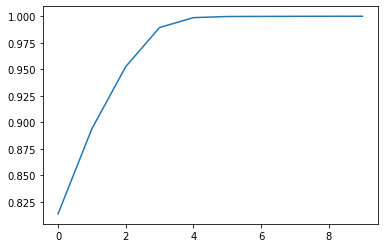

In [144]:
R=np.corrcoef(DFC.astype(float))
VP=np.linalg.eig(R)[0]
VP=VP[:10]
import matplotlib.pyplot as plt
plt.plot(np.cumsum(VP/sum(VP)))

In [150]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(DFC)
X_transformed

array([[-0.33695833, -0.51413888],
       [-0.34062524, -0.49497502],
       [-0.06641511, -0.51413173],
       [-0.34108819, -0.49600272],
       [ 0.20608753, -0.03754935],
       [-0.16779261,  0.20471127],
       [-0.32195192, -0.47540627],
       [-0.33100706, -0.43513522],
       [-0.25801223, -0.39436391],
       [-0.10815972,  1.76208716],
       [-0.34217627, -0.51376996],
       [ 0.43957495, -0.40137212],
       [-0.32192424, -0.35939565],
       [-0.34514101, -0.50370441],
       [-0.33670721, -0.43460853],
       [-0.32185232, -0.46691543],
       [-0.32329833, -0.43747971],
       [-0.33709993, -0.49496081],
       [-0.24921617,  0.41845108],
       [-0.2058194 , -0.07421945],
       [-0.3007454 , -0.45482608],
       [-0.33462764, -0.41994701],
       [-0.23955896, -0.26840416],
       [ 0.75066055,  1.14986399],
       [-0.33953677, -0.49407245],
       [ 1.24547635,  5.99932185],
       [-0.28260221,  0.08604157],
       [-0.33804263, -0.47531365],
       [ 0.59650733,

In [195]:
fa = FactorAnalyzer(n_factors=2,rotation='varimax',method='principal')

In [196]:
fa.fit(DFC)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [197]:
fa.loadings_[:,1]

array([ 0.45546746, -0.08232499, -0.08994728,  0.96190127, -0.05198372,
        0.15072335, -0.07765574, -0.16180911,  0.17485861, -0.06512967,
       -0.09996622,  0.1215242 , -0.09320703, -0.01056595, -0.02219205,
       -0.01393779, -0.01098136,  0.73931683,  0.89450427, -0.81352279,
       -0.68284571, -0.06106573,  0.08393779, -0.0401608 ,  0.00530207,
        0.02210122,  0.04349137,  0.00530027,  0.06312084,  0.94530728,
       -0.06803788,  0.15656907,  0.0066234 ,  0.43251187, -0.05236315,
        0.01667733,  0.01489277, -0.02145986,  0.13154879,  0.16509638,
       -0.02934359, -0.10800373, -0.00374716,  0.49231993,  0.08747781,
        0.95461601,  0.09544147,  0.86760431,  0.04350861, -0.02353073,
       -0.03019176])

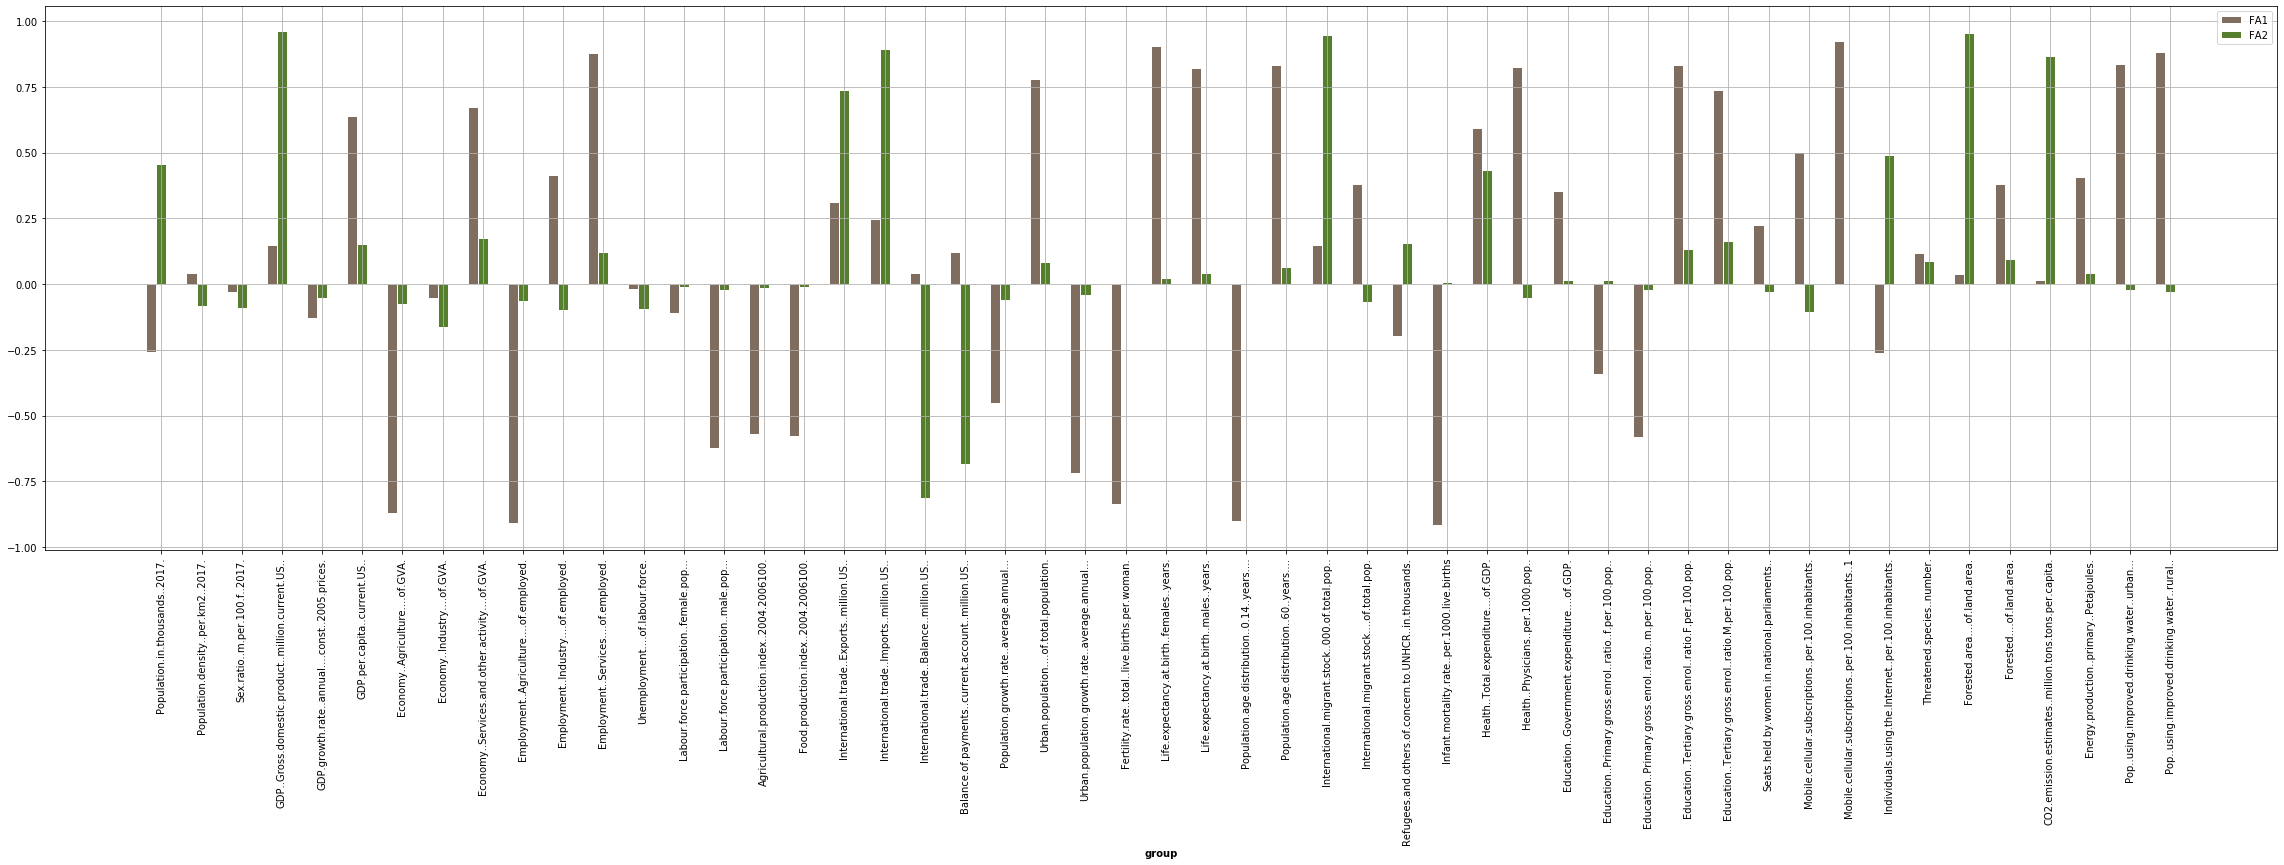

In [198]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = fa.loadings_[:,0]
bars2 = fa.loadings_[:,1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(40,10))
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='FA1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='FA2')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], DFC.columns, rotation='vertical')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()
#10 Barplot with number of observation

